In [6]:
# Imports principales para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays


In [22]:
# Cargar los datos de ventas y competencias desde data/raw/entrenamiento
ventas_path = "../data/raw/entrenamiento/ventas.csv"
competencia_path = "../data/raw/entrenamiento/competencia.csv"

# Cargar los archivos CSV en DataFrames
ventas_df = pd.read_csv(ventas_path)
competencia_df = pd.read_csv(competencia_path)

# Mostrar las primeras filas para verificar
print("Ventas:")
print(ventas_df.head())
print("\nCompetencias:")
print(competencia_df.head())

Ventas:
        fecha producto_id                            nombre categoria  \
0  2021-10-25    PROD_001          Nike Air Zoom Pegasus 40   Running   
1  2021-10-25    PROD_002              Adidas Ultraboost 23   Running   
2  2021-10-25    PROD_003               Asics Gel Nimbus 25   Running   
3  2021-10-25    PROD_004  New Balance Fresh Foam X 1080v12   Running   
4  2021-10-25    PROD_005                Nike Dri-FIT Miler   Running   

         subcategoria  precio_base  es_estrella  unidades_vendidas  \
0  Zapatillas Running          115         True                  6   
1  Zapatillas Running          135         True                 10   
2  Zapatillas Running           85        False                  2   
3  Zapatillas Running           75        False                  2   
4        Ropa Running           35        False                  2   

   precio_venta  ingresos  
0        118.36    710.16  
1        136.82   1368.20  
2         84.93    169.86  
3         75.42    1

In [23]:
# --- REPORTE DE CALIDAD DE DATOS (DATA QUALITY) ---

print("1. VISIÓN GENERAL (Tipos de datos y memoria):")
ventas_df.info()
print("-" * 50)

print("\n2. CONTEO DE VALORES NULOS (Huecos vacíos):")
print(ventas_df.isnull().sum())
print("-" * 50)

print("\n3. FILAS DUPLICADAS (Repetidos):")
cantidad_duplicados = ventas_df.duplicated().sum()
print(f"Total duplicados encontrados: {cantidad_duplicados}")
print("-" * 50)

print("\n4. ESTADÍSTICAS DESCRIPTIVAS (Resumen matemático):")
# Esto muestra promedio, mín, máx para columnas numéricas
display(ventas_df.describe())

1. VISIÓN GENERAL (Tipos de datos y memoria):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              3552 non-null   object 
 1   producto_id        3552 non-null   object 
 2   nombre             3552 non-null   object 
 3   categoria          3552 non-null   object 
 4   subcategoria       3552 non-null   object 
 5   precio_base        3552 non-null   int64  
 6   es_estrella        3552 non-null   bool   
 7   unidades_vendidas  3552 non-null   int64  
 8   precio_venta       3552 non-null   float64
 9   ingresos           3552 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 253.3+ KB
--------------------------------------------------

2. CONTEO DE VALORES NULOS (Huecos vacíos):
fecha                0
producto_id          0
nombre               0
categoria            0
subcategor

,precio_base,unidades_vendidas,precio_venta,ingresos
count,3552.000000,3552.00000,3552.000000,3552.000000
mean,123.125000,4.87866,121.816546,605.972323
std,165.576753,6.31102,164.017963,1079.071192
min,20.000000,1.00000,19.000000,19.460000
25%,48.750000,2.00000,47.212500,131.535000
50%,72.500000,3.00000,71.810000,216.570000
75%,118.750000,5.00000,118.220000,639.637500
max,830.000000,85.00000,854.220000,14508.400000


In [24]:
# --- TRANSFORMACIÓN DE DATOS (DATA CASTING) ---

# 1. Conversión de Tipos (String -> Datetime)
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'])
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'])

# 2. Verificación de Integridad
print("-" * 40)
print("VERIFICACIÓN DE DTYPES:")
print(f"ventas_df['fecha']:      {ventas_df['fecha'].dtype}")
print(f"competencia_df['fecha']: {competencia_df['fecha'].dtype}")

----------------------------------------
VERIFICACIÓN DE DTYPES:
ventas_df['fecha']:      datetime64[ns]
competencia_df['fecha']: datetime64[ns]


In [19]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 253.3+ KB


In [ ]:
# --- INTEGRACIÓN DE DATOS (MERGE/JOIN) ---

# Realizamos un 'Inner Join' entre ventas y competencia
# Utilizamos una llave compuesta (Composite Key): 'fecha' y 'producto_id'
df = pd.merge(
    ventas_df,
    competencia_df,
    how='inner',
    on=['fecha', 'producto_id']
)

# Verificación de la estructura resultante
print("--- DIMENSIONES DEL DATASET INTEGRADO ---")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n--- MUESTRA DE DATOS ---")
display(df.head())

--- DIMENSIONES DEL DATASET INTEGRADO ---
Filas: 3552, Columnas: 13

--- MUESTRA DE DATOS ---


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


## Analisis Exploratorio Completo de 'df'
se presentan a continuacion distintos analisis

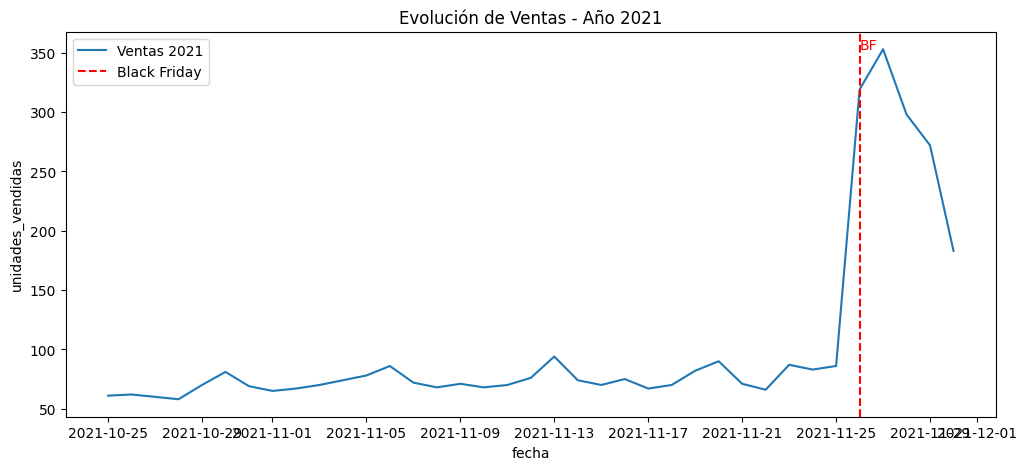

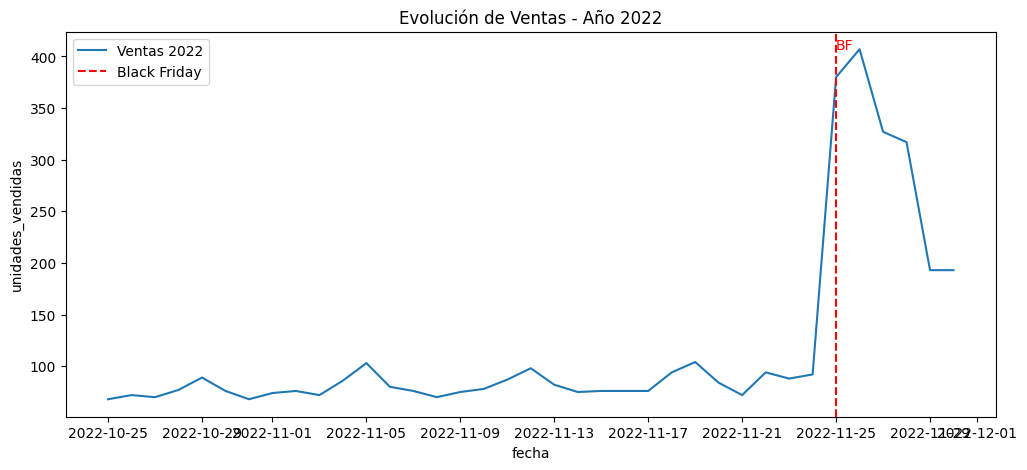

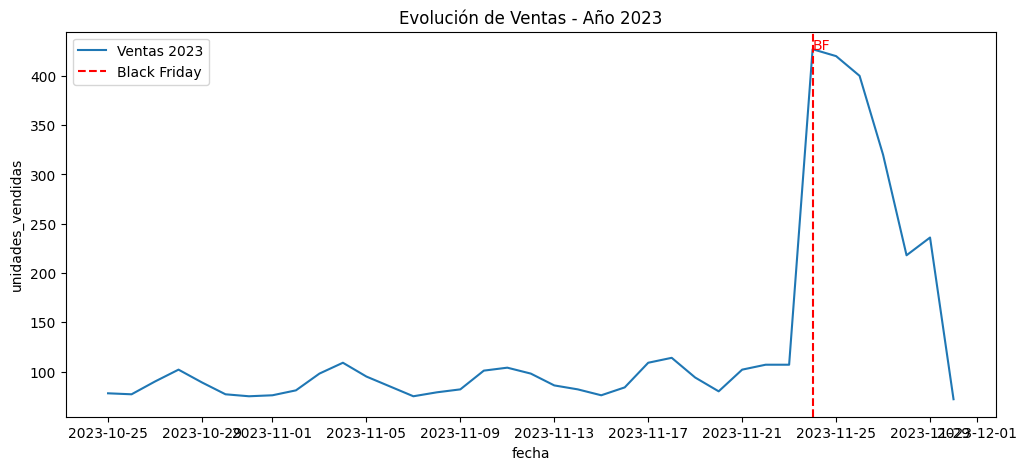

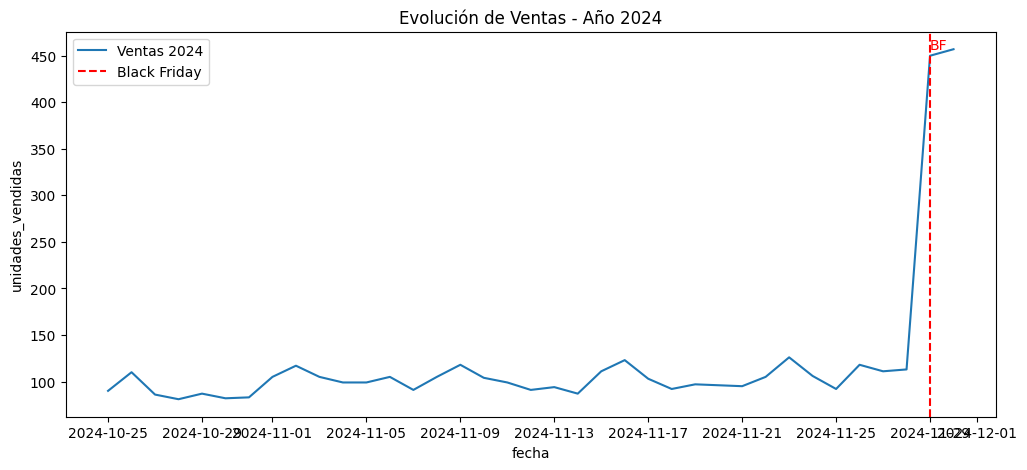

In [36]:
# --- ANÁLISIS TEMPORAL POR AÑO: LÍNEAS DE VENTAS Y BLACK FRIDAY ---
black_fridays = [
    '2019-11-29', '2020-11-27', '2021-11-26', 
    '2022-11-25', '2023-11-24', '2024-11-29'
]
df['anio'] = df['fecha'].dt.year
anios_disponibles = df['anio'].unique()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for anio in anios_disponibles:
    df_anio = df[df['anio'] == anio]
    ventas_diarias = df_anio.groupby('fecha')['unidades_vendidas'].sum().reset_index()
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=ventas_diarias, x='fecha', y='unidades_vendidas', label=f'Ventas {anio}')
    for bf in black_fridays:
        bf_date = pd.to_datetime(bf)
        if bf_date.year == anio:
            plt.axvline(x=bf_date, color='red', linestyle='--', label='Black Friday')
            plt.text(bf_date, ventas_diarias['unidades_vendidas'].max(), 'BF', color='red')
    plt.title(f'Evolución de Ventas - Año {anio}')
    plt.legend()
    plt.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\3296049100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='dia_semana', y='unidades_vendidas', estimator='sum', order=orden_dias, palette='viridis')


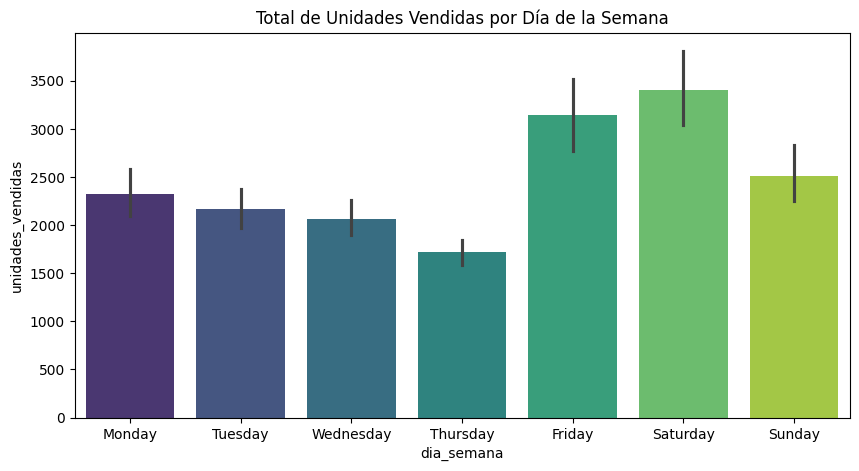

In [34]:
# --- ANÁLISIS POR DÍA DE LA SEMANA ---
df['dia_semana'] = df['fecha'].dt.day_name()
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='dia_semana', y='unidades_vendidas', estimator='sum', order=orden_dias, palette='viridis')
plt.title('Total de Unidades Vendidas por Día de la Semana')
plt.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\3723267116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='categoria', y='unidades_vendidas', estimator='sum', palette='magma')


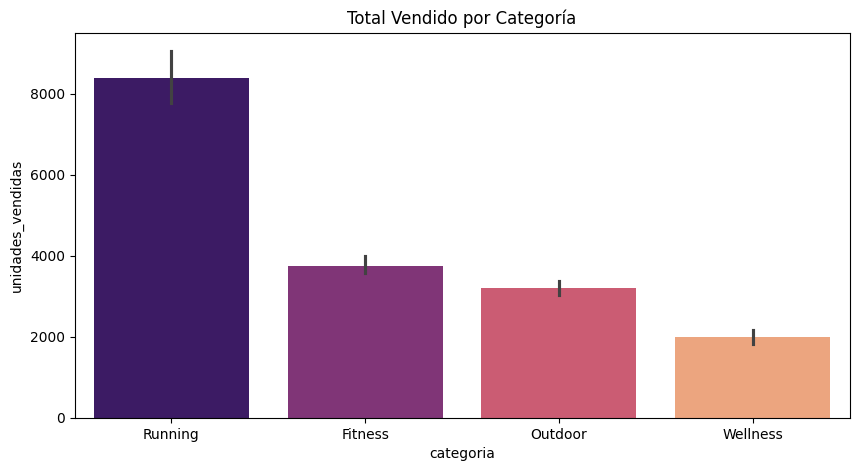

In [33]:
# --- ANÁLISIS POR CATEGORÍA ---
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='categoria', y='unidades_vendidas', estimator='sum', palette='magma')
plt.title('Total Vendido por Categoría')
plt.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\2477888600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='subcategoria', y='unidades_vendidas', estimator='sum', palette='rocket')


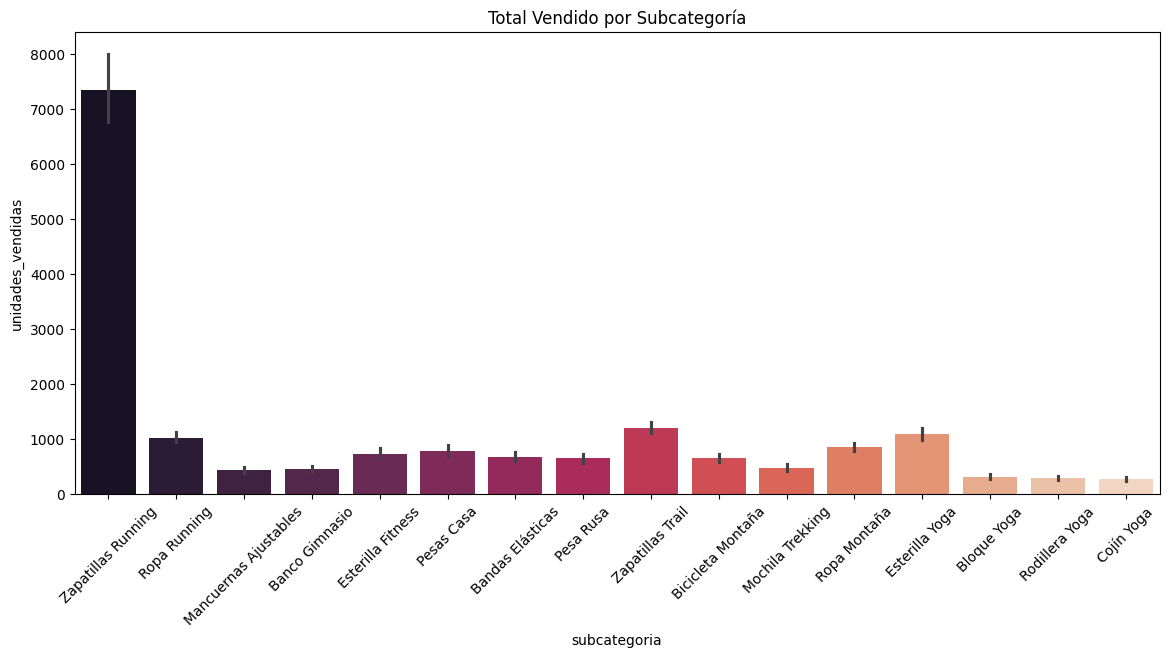

In [32]:
# --- ANÁLISIS POR SUBCATEGORÍA ---
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='subcategoria', y='unidades_vendidas', estimator='sum', palette='rocket')
plt.xticks(rotation=45)
plt.title('Total Vendido por Subcategoría')
plt.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\3959836608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_productos, y='nombre', x='unidades_vendidas', palette='coolwarm')


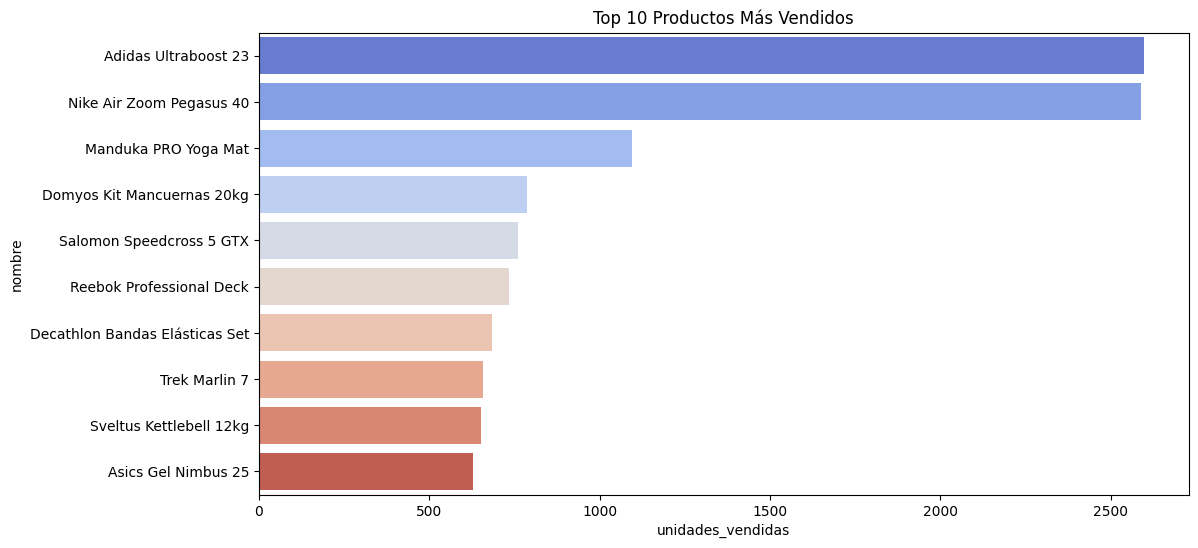

In [31]:
# --- ANÁLISIS DE TOP PRODUCTOS ---
# Agrupamos por nombre del producto y sumamos ventas
if 'nombre' in df.columns:
    top_productos = df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(10).reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_productos, y='nombre', x='unidades_vendidas', palette='coolwarm')
    plt.title('Top 10 Productos Más Vendidos')
    plt.show()
else:
    print("La columna 'nombre' no existe en el dataframe. Verifica el nombre correcto de la columna de productos.")

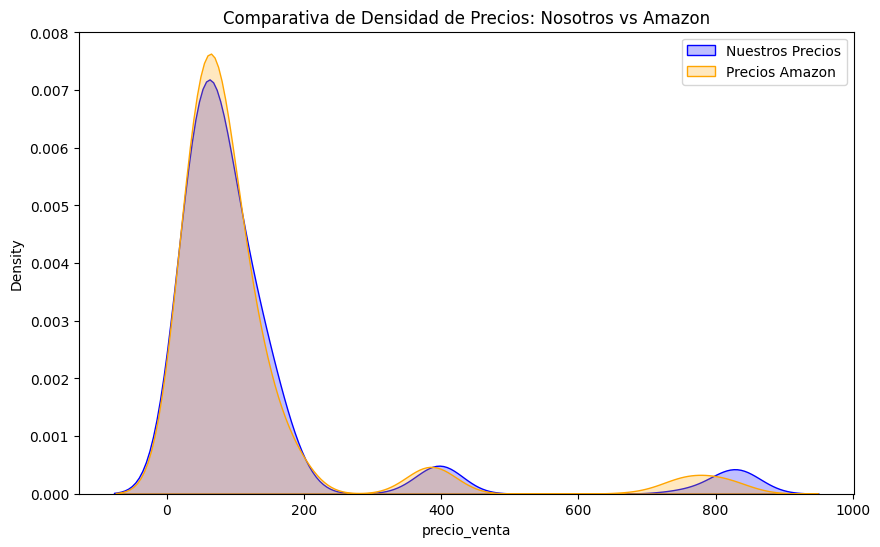

In [30]:
# --- ANÁLISIS DE DENSIDAD DE PRECIOS: NUESTROS VS AMAZON ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='precio_venta', fill=True, label='Nuestros Precios', color='blue')
sns.kdeplot(data=df, x='Amazon', fill=True, label='Precios Amazon', color='orange')
plt.title('Comparativa de Densidad de Precios: Nosotros vs Amazon')
plt.legend()
plt.show()

In [ ]:
# --- CREACIÓN DE VARIABLES TEMPORALES Y DE CALENDARIO ---
import holidays

# Variables temporales básicas
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.day_name()
df['es_fin_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday'])

# Festivos en España
es_festivo = df['fecha'].isin([d for d in holidays.country_holidays('ES', years=df['anio'].unique())])
df['es_festivo'] = es_festivo.values

# Black Friday (último viernes de noviembre)
def es_black_friday(fecha):
    if fecha.month == 11 and fecha.weekday() == 4:
        # Viernes de noviembre
        # Es el último viernes si la semana siguiente es diciembre
        return (fecha + pd.Timedelta(days=7)).month == 12
    return False
df['es_Black_Friday'] = df['fecha'].apply(es_black_friday)

# Cyber Monday (primer lunes después de Black Friday)
def es_cyber_monday(fecha):
    if fecha.month == 11 and fecha.weekday() == 0:
        # Lunes de noviembre
        # El lunes después del último viernes
        ultimo_viernes = max([d for d in df['fecha'] if d.month == 11 and d.weekday() == 4 and d.year == fecha.year])
        return fecha == (ultimo_viernes + pd.Timedelta(days=3))
    elif fecha.month == 12 and fecha.weekday() == 0:
        # Puede caer en diciembre
        ultimo_viernes = max([d for d in df['fecha'] if d.month == 11 and d.weekday() == 4 and d.year == fecha.year])
        return fecha == (ultimo_viernes + pd.Timedelta(days=3))
    return False
df['es_cyber_Monday'] = df['fecha'].apply(es_cyber_monday)

# Día del año (1-366)
df['dia_anio'] = df['fecha'].dt.dayofyear
# Semana del año
df['semana_anio'] = df['fecha'].dt.isocalendar().week
# Trimestre
df['trimestre'] = df['fecha'].dt.quarter
# ¿Es principio de mes?
df['es_principio_mes'] = df['dia_mes'] <= 3
# ¿Es fin de mes?
df['es_fin_mes'] = df['fecha'] == df['fecha'] + pd.offsets.MonthEnd(0)

# Mostrar las primeras filas para verificar
print(df[['fecha','anio','mes','mes_nombre','dia_mes','dia_semana','es_fin_semana','es_festivo','es_Black_Friday','es_cyber_Monday','dia_anio','semana_anio','trimestre','es_principio_mes','es_fin_mes']].head())

In [39]:
# --- CREACIÓN DE LAGS Y MEDIA MÓVIL POR AÑO ---
lag_cols = []
for anio in df['anio'].unique():
    df_anio = df[df['anio'] == anio].sort_values('fecha')
    for lag in range(1, 8):
        col_name = f'unidades_vendidas_lag{lag}'
        df.loc[df_anio.index, col_name] = df_anio['unidades_vendidas'].shift(lag)
        lag_cols.append(col_name)
    # Media móvil de 7 días
    df.loc[df_anio.index, 'mm7_unidades_vendidas'] = df_anio['unidades_vendidas'].rolling(window=7).mean()

# Eliminar registros con nulos en alguna de las nuevas variables
vars_nuevas = lag_cols + ['mm7_unidades_vendidas']
df = df.dropna(subset=vars_nuevas)

# Mostrar las primeras filas para verificar
print(df[['fecha','anio','unidades_vendidas'] + lag_cols + ['mm7_unidades_vendidas']].head(10))

        fecha  anio  unidades_vendidas  unidades_vendidas_lag1  \
1  2021-10-25  2021                 10                     2.0   
2  2021-10-25  2021                  2                     2.0   
3  2021-10-25  2021                  2                     2.0   
4  2021-10-25  2021                  2                     2.0   
5  2021-10-25  2021                  2                     2.0   
6  2021-10-25  2021                  2                     2.0   
7  2021-10-25  2021                  2                     2.0   
8  2021-10-25  2021                  2                     2.0   
9  2021-10-25  2021                  2                     3.0   
10 2021-10-25  2021                  3                     2.0   

    unidades_vendidas_lag2  unidades_vendidas_lag3  unidades_vendidas_lag4  \
1                      2.0                     2.0                     2.0   
2                      2.0                     2.0                     2.0   
3                      2.0             

In [42]:
# --- CREACIÓN DE VARIABLE DESCUENTO PORCENTAJE ---
df['descuento_porcentaje'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100

# Mostrar las primeras filas para verificar
df[['fecha', 'precio_base', 'precio_venta', 'descuento_porcentaje']].head(10)

C:\Users\lucia\AppData\Local\Temp\ipykernel_28984\3851288360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['descuento_porcentaje'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100


,fecha,precio_base,precio_venta,descuento_porcentaje
1,2021-10-25,135,136.82,1.348148
2,2021-10-25,85,84.93,-0.082353
3,2021-10-25,75,75.42,0.560000
4,2021-10-25,35,35.87,2.485714
5,2021-10-25,65,65.51,0.784615
6,2021-10-25,70,70.98,1.400000
7,2021-10-25,65,66.60,2.461538
8,2021-10-25,400,392.31,-1.922500
9,2021-10-25,175,174.92,-0.045714
10,2021-10-25,45,44.32,-1.511111


In [ ]:
# --- CREACIÓN DE VARIABLES DE COMPETENCIA Y RATIO DE PRECIOS ---
# Precio promedio de la competencia
competidores = ['Amazon', 'Decathlon', 'Deporvillage']
df['precio_competencia'] = df[competidores].mean(axis=1)
# Ratio de nuestro precio respecto a la competencia
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']
# Eliminar las columnas individuales de los competidores
df = df.drop(columns=competidores)
# Mostrar las primeras filas para verificar
print(df[['fecha', 'precio_venta', 'precio_competencia', 'ratio_precio']].head(10))

In [46]:
# --- COPIA Y ONE HOT ENCODING DE VARIABLES CATEGÓRICAS ---
# Crear copias con sufijo _h
df['nombre_h'] = df['nombre']
df['categoria_h'] = df['categoria']
df['subcategoria_h'] = df['subcategoria']

# One hot encoding sobre las nuevas variables
one_hot = pd.get_dummies(df[['nombre_h', 'categoria_h', 'subcategoria_h']], prefix=['nombre_h', 'categoria_h', 'subcategoria_h'])
df = pd.concat([df, one_hot], axis=1)

# Mostrar las primeras filas para verificar
df.filter(regex='_h').head()

,nombre_h,categoria_h,subcategoria_h,nombre_h_Adidas Own The Run Jacket,nombre_h_Adidas Ultraboost 23,nombre_h_Asics Gel Nimbus 25,nombre_h_Bowflex SelectTech 552,nombre_h_Columbia Silver Ridge,nombre_h_Decathlon Bandas Elásticas Set,nombre_h_Domyos BM900,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
1,Adidas Ultraboost 23,Running,Zapatillas Running,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Asics Gel Nimbus 25,Running,Zapatillas Running,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,Nike Dri-FIT Miler,Running,Ropa Running,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,Adidas Own The Run Jacket,Running,Ropa Running,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [49]:
#Guardar el DataFrame procesado
df.to_csv("../data/processed/df.csv", index=False)
print("DataFrame procesado guardado en ../data/processed/df.csv")

DataFrame procesado guardado en ../data/processed/df.csv


In [51]:
# --- DIVISIÓN EN TRAIN Y VALIDATION SEGÚN AÑO ---
train_df = df[df['anio'].isin([2021, 2022, 2023])].copy()
validation_df = df[df['anio'] == 2024].copy()
print(f"Registros en train_df: {len(train_df)}") # registros para entrenamiento
print(f"Registros en validation_df: {len(validation_df)}") # registros para validación

Registros en train_df: 2643
Registros en validation_df: 881


In [55]:
# --- ENTRENAMIENTO Y VALIDACIÓN DE HistGradientBoostingRegressor ---
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selección de variables predictoras (excluyendo fecha, ingresos y tipo object)
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
X_cols = [col for col in train_df.select_dtypes(exclude=['object']).columns if col not in excluir]

X_train = train_df[X_cols]
y_train = train_df['unidades_vendidas']
X_val = validation_df[X_cols]
y_val = validation_df['unidades_vendidas']

# Modelo conservador para evitar overfitting
model = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_val)

# Baseline naive: predice la media del train
y_pred_naive = np.full_like(y_val, y_train.mean(), dtype=np.float64)

# Métricas
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

mae_naive = mean_absolute_error(y_val, y_pred_naive)
mse_naive = mean_squared_error(y_val, y_pred_naive)
rmse_naive = np.sqrt(mse_naive)
r2_naive = r2_score(y_val, y_pred_naive)

print('--- MÉTRICAS HistGradientBoostingRegressor ---')
print(f'MAE:  {mae:.2f}')
print(f'MSE:  {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2:   {r2:.3f}')
print('\n--- MÉTRICAS BASELINE (media) ---')
print(f'MAE:  {mae_naive:.2f}')
print(f'MSE:  {mse_naive:.2f}')
print(f'RMSE: {rmse_naive:.2f}')
print(f'R2:   {r2_naive:.3f}')

--- MÉTRICAS HistGradientBoostingRegressor ---
MAE:  0.75
MSE:  1.78
RMSE: 1.33
R2:   0.955

--- MÉTRICAS BASELINE (media) ---
MAE:  3.35
MSE:  39.17
RMSE: 6.26
R2:   -0.001


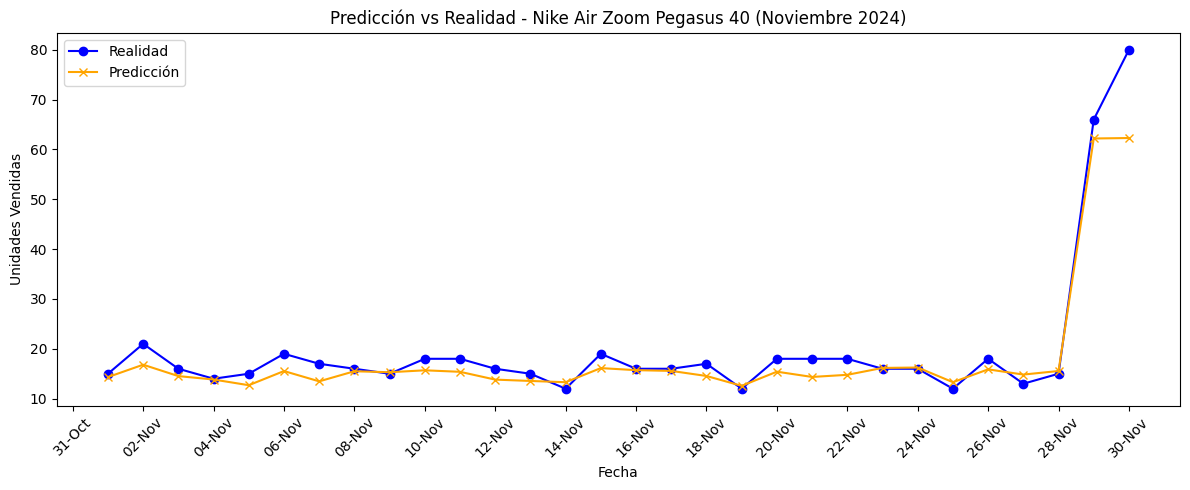

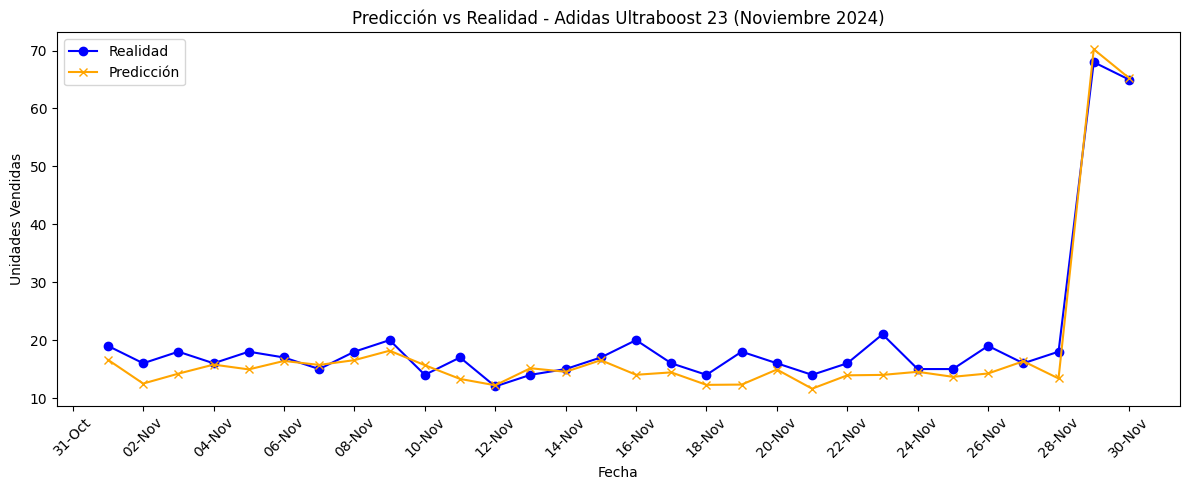

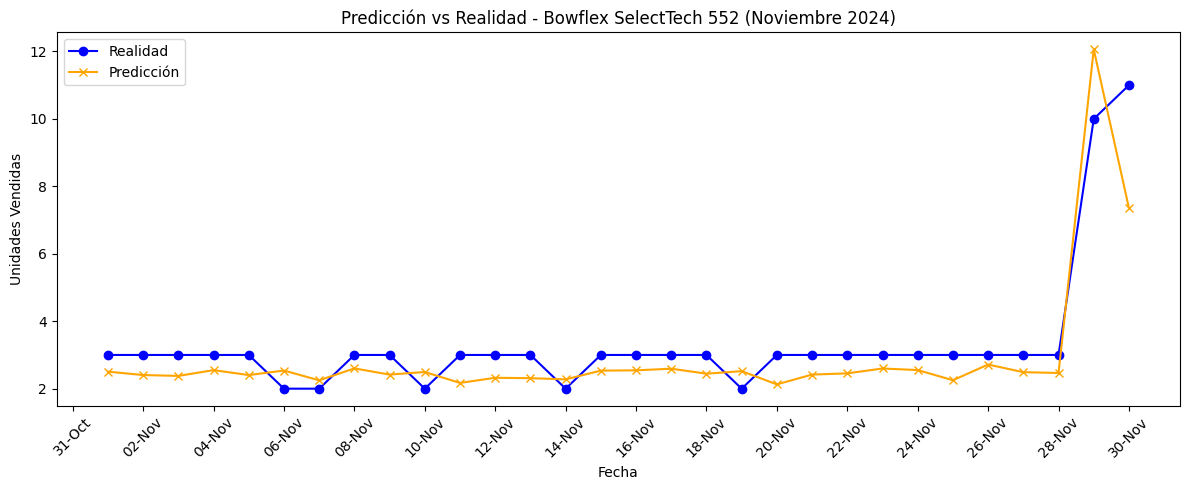

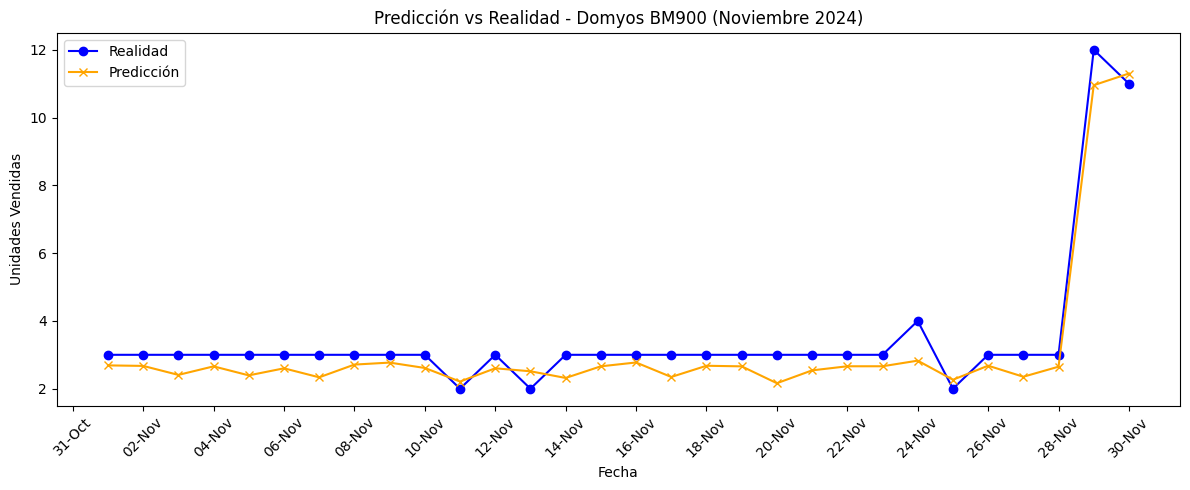

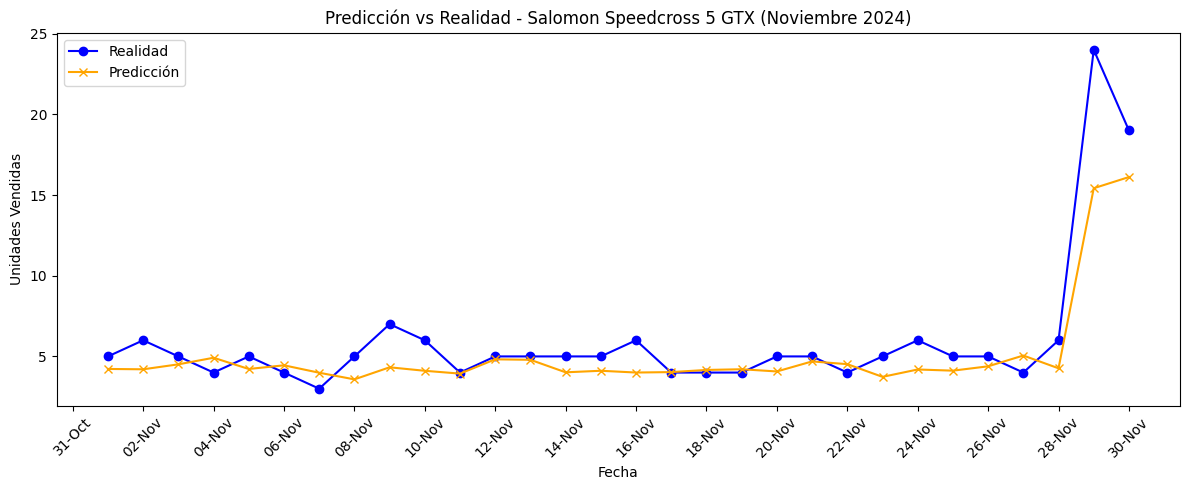

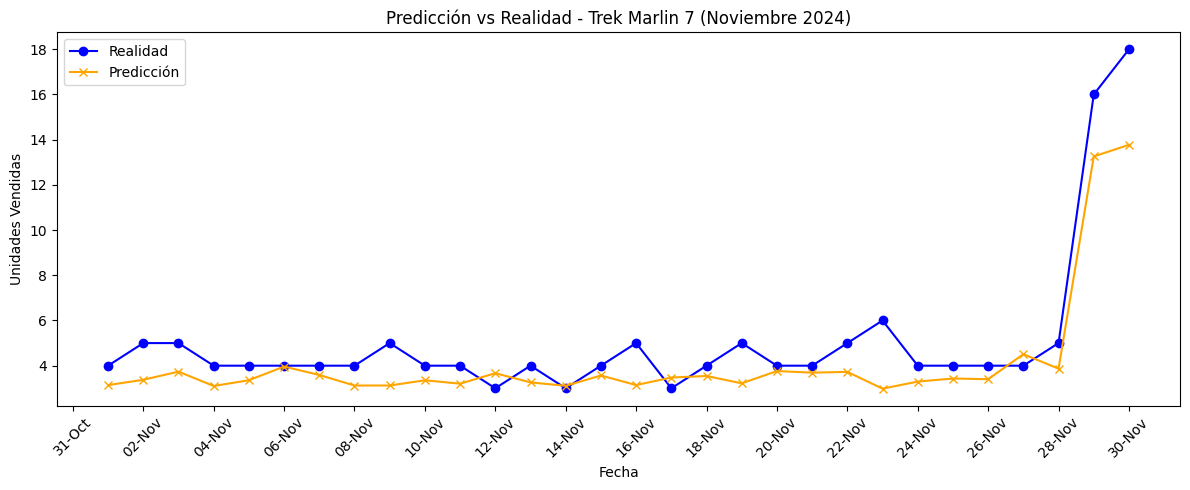

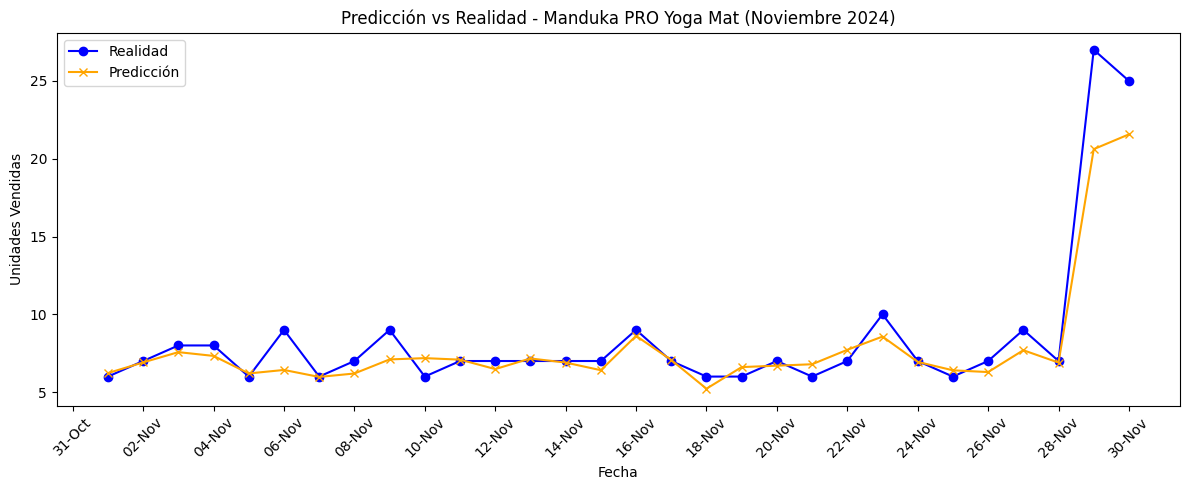

In [56]:
# --- PREDICCIÓN NOVIEMBRE 2024 PARA PRODUCTOS ESTRELLA Y GRÁFICOS ---
import matplotlib.dates as mdates

# Filtrar noviembre 2024
nov_2024 = df[(df['fecha'] >= '2024-11-01') & (df['fecha'] <= '2024-11-30')].copy()

# Filtrar productos estrella
productos_estrella = nov_2024[nov_2024['es_estrella'] == 1]['nombre'].unique()
productos_estrella = productos_estrella[:7]  # Aseguramos que sean 7

# Selección de variables predictoras (igual que en el entrenamiento)
X_cols = [col for col in nov_2024.select_dtypes(exclude=['object']).columns if col not in ['fecha', 'ingresos', 'unidades_vendidas']]

for producto in productos_estrella:
    df_prod = nov_2024[nov_2024['nombre'] == producto].copy()
    if df_prod.empty:
        print(f"No hay datos para el producto {producto} en noviembre 2024.")
        continue
    X_prod = df_prod[X_cols]
    y_real = df_prod['unidades_vendidas']
    fechas = df_prod['fecha']
    y_pred = model.predict(X_prod)

    plt.figure(figsize=(12, 5))
    plt.plot(fechas, y_real, marker='o', label='Realidad', color='blue')
    plt.plot(fechas, y_pred, marker='x', label='Predicción', color='orange')
    plt.title(f'Predicción vs Realidad - {producto} (Noviembre 2024)')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades Vendidas')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [57]:
# --- MAE POR PRODUCTO ESTRELLA EN NOVIEMBRE 2024 ---
from sklearn.metrics import mean_absolute_error

mae_por_producto = {}
for producto in productos_estrella:
    df_prod = nov_2024[nov_2024['nombre'] == producto].copy()
    if df_prod.empty:
        mae_por_producto[producto] = None
        continue
    X_prod = df_prod[X_cols]
    y_real = df_prod['unidades_vendidas']
    y_pred = model.predict(X_prod)
    mae = mean_absolute_error(y_real, y_pred)
    mae_por_producto[producto] = mae

print('MAE para cada producto estrella en noviembre 2024:')
for producto, mae in mae_por_producto.items():
    if mae is not None:
        print(f"{producto}: {mae:.2f}")
    else:
        print(f"{producto}: Sin datos para noviembre 2024")

MAE para cada producto estrella en noviembre 2024:
Nike Air Zoom Pegasus 40: 2.34
Adidas Ultraboost 23: 2.23
Bowflex SelectTech 552: 0.68
Domyos BM900: 0.46
Salomon Speedcross 5 GTX: 1.25
Trek Marlin 7: 1.06
Manduka PRO Yoga Mat: 0.90


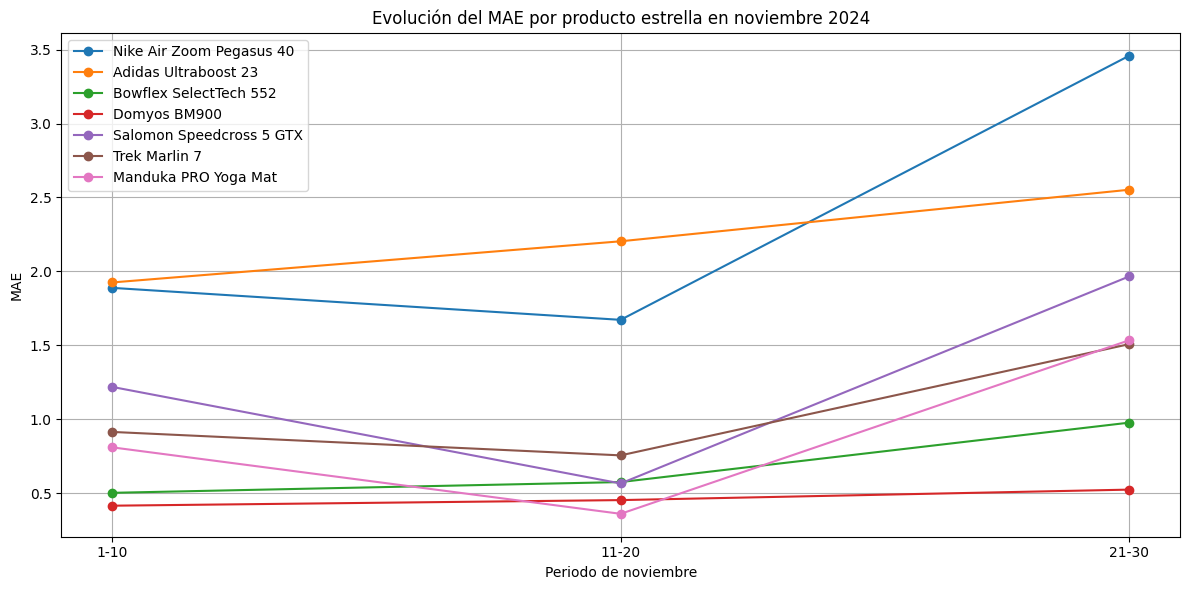

Métricas por periodo de 10 días para cada producto estrella:


,producto,periodo,MAE,MSE,RMSE,R2
0,Nike Air Zoom Pegasus 40,1-10,1.888625,5.554464,2.356791,-0.310015
1,Nike Air Zoom Pegasus 40,11-20,1.672254,3.684652,1.919545,0.276100
2,Nike Air Zoom Pegasus 40,21-30,3.458946,36.143402,6.011938,0.932814
3,Adidas Ultraboost 23,1-10,1.925186,5.094732,2.257151,-0.648781
4,Adidas Ultraboost 23,11-20,2.203716,9.026108,3.004348,-0.924543
5,Adidas Ultraboost 23,21-30,2.552439,11.037474,3.322269,0.972435
6,Bowflex SelectTech 552,1-10,0.502012,0.263809,0.513623,-0.256231
7,Bowflex SelectTech 552,11-20,0.574829,0.362828,0.602352,-1.267678
8,Bowflex SelectTech 552,21-30,0.976786,1.975048,1.405364,0.781763
9,Domyos BM900,1-10,0.414977,0.192751,0.439035,0.000000


In [58]:
# --- ANÁLISIS DE DEGRADACIÓN DEL ERROR POR PERÍODOS DE 10 DÍAS EN NOVIEMBRE 2024 ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definir los periodos
periodos = [(1,10), (11,20), (21,30)]
periodos_labels = ['1-10', '11-20', '21-30']

# DataFrame para guardar resultados
resultados = []

for producto in productos_estrella:
    df_prod = nov_2024[nov_2024['nombre'] == producto].copy()
    if df_prod.empty:
        continue
    for i, (ini, fin) in enumerate(periodos):
        mask = (df_prod['fecha'].dt.day >= ini) & (df_prod['fecha'].dt.day <= fin)
        df_periodo = df_prod[mask]
        if df_periodo.empty:
            resultados.append({'producto': producto, 'periodo': periodos_labels[i], 'MAE': None, 'MSE': None, 'RMSE': None, 'R2': None})
            continue
        X_p = df_periodo[X_cols]
        y_real = df_periodo['unidades_vendidas']
        y_pred = model.predict(X_p)
        mae = mean_absolute_error(y_real, y_pred)
        mse = mean_squared_error(y_real, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_real, y_pred)
        resultados.append({'producto': producto, 'periodo': periodos_labels[i], 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Graficar la evolución del MAE para cada producto
plt.figure(figsize=(12,6))
for producto in productos_estrella:
    datos = df_resultados[df_resultados['producto'] == producto]
    if datos['MAE'].notnull().any():
        plt.plot(periodos_labels, datos['MAE'], marker='o', label=producto)
plt.title('Evolución del MAE por producto estrella en noviembre 2024')
plt.xlabel('Periodo de noviembre')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar la tabla de métricas
print('Métricas por periodo de 10 días para cada producto estrella:')
display(df_resultados)

In [59]:
# --- REENTRENAMIENTO FINAL CON TODOS LOS DATOS HISTÓRICOS (2021-2024) ---
# Selección de variables predictoras (igual que antes)
excluir = ['fecha', 'ingresos', 'unidades_vendidas']
X_cols_final = [col for col in df.select_dtypes(exclude=['object']).columns if col not in excluir]

X_full = df[X_cols_final]
y_full = df['unidades_vendidas']

# Entrenamiento del modelo final
modelo_final = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=400,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
modelo_final.fit(X_full, y_full)

print('Modelo final HistGradientBoostingRegressor entrenado con todos los datos de 2021 a 2024.')

Modelo final HistGradientBoostingRegressor entrenado con todos los datos de 2021 a 2024.


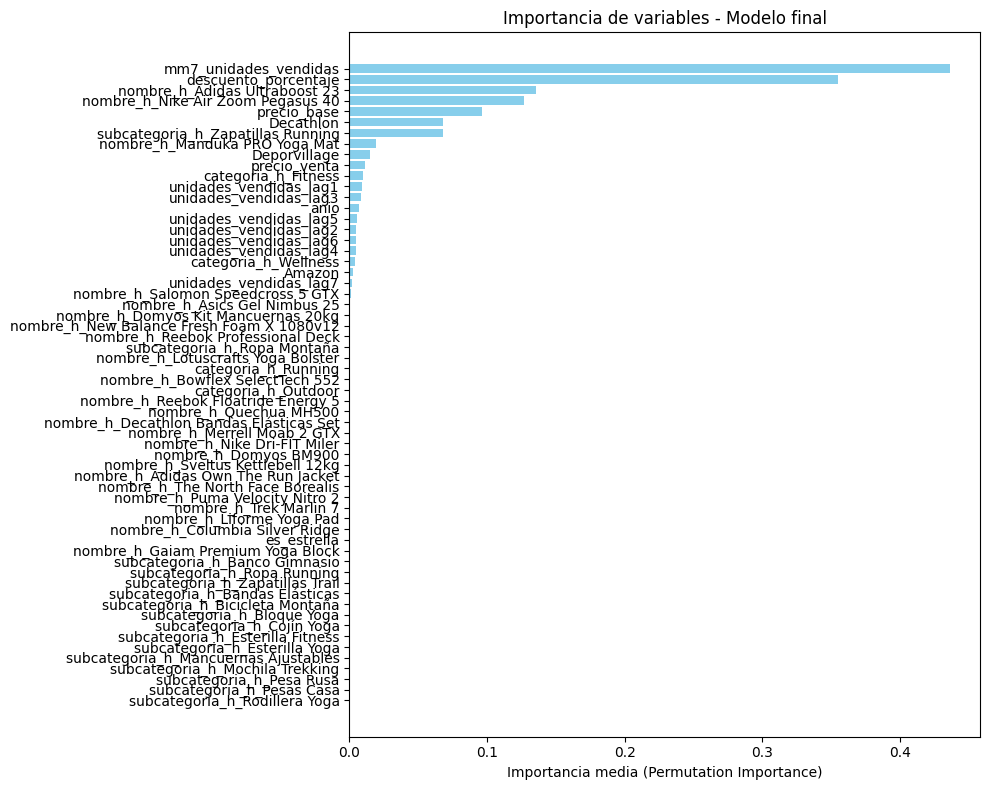

Modelo final guardado en ../models/modelo_final.joblib


In [61]:
# --- IMPORTANCIA DE VARIABLES Y GUARDADO DEL MODELO FINAL ---
from sklearn.inspection import permutation_importance
import joblib

# Calcular permutation importance
result = permutation_importance(modelo_final, X_full, y_full, n_repeats=10, random_state=42, n_jobs=-1)

# Usar los nombres de variables realmente usados por el modelo
variables_importancia = result.feature_names_in_ if hasattr(result, 'feature_names_in_') else X_full.columns

# Crear DataFrame de importancias
importancias = pd.DataFrame({
    'variable': variables_importancia,
    'importancia': result.importances_mean
}).sort_values('importancia', ascending=False)

# Gráfico de barras horizontales ordenado
plt.figure(figsize=(10, 8))
plt.barh(importancias['variable'], importancias['importancia'], color='skyblue')
plt.xlabel('Importancia media (Permutation Importance)')
plt.title('Importancia de variables - Modelo final')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Guardar el modelo final
joblib.dump(modelo_final, '../models/modelo_final.joblib')
print('Modelo final guardado en ../models/modelo_final.joblib')